In [1]:
import pandas as pd

filename = 'BRAZPD_pickedup.csv'

df = pd.read_csv(filename, engine='python')


In [2]:
display(df)

,Deathevent,Causeofdeath,TechniqueFailureevent,Hemoglobin,Potassium,Phosphate,FRR,codigoclinica,ModalidadeCAPD0APD1Mix2,CenterSizenpatients,...,TechFailureDeathnotcens,Regionsdic,CRDeath,CRTechniqueFailure,anodeentrada,mesdeentrada,Anodesada,mesdesaida,cidade,BMI_Cat
0,1,5.0,0,12.933333,4.433333,5.300000,0,1,0,128,...,1,0,1,2,2005,9,2006,1,66,1
1,0,NaN,1,14.000000,3.766667,5.933333,0,1,0,128,...,1,0,2,1,2005,9,2008,3,66,3
2,0,NaN,1,11.833333,4.366667,6.100000,1,1,1,128,...,1,0,2,1,2005,9,2006,4,66,3
3,1,7.0,0,10.066667,4.733333,5.533333,1,1,0,128,...,1,0,1,2,2005,9,2007,4,66,3
4,1,5.0,0,11.933333,4.033333,4.066667,0,1,2,128,...,1,0,1,2,2005,10,2006,6,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,0,NaN,0,8.400000,5.500000,4.700000,1,347,1,66,...,0,0,0,0,2010,7,2011,1,68,1
5703,0,NaN,0,9.700000,4.300000,3.233333,1,347,1,66,...,0,0,0,0,2010,8,2011,1,68,1
5704,0,NaN,0,10.466667,4.433333,4.466667,1,347,1,66,...,0,0,0,0,2010,8,2011,1,68,1
5705,0,NaN,0,11.766667,4.533333,3.566667,1,347,1,66,...,0,0,0,0,2010,8,2011,1,68,3


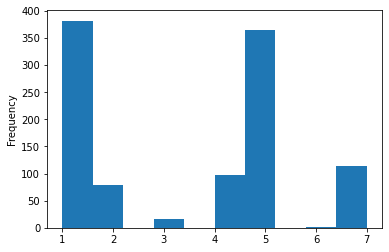

In [3]:
from matplotlib import pyplot as plt

col_values = ['Causeofdeath']
for key in col_values:
    plt.figure()
    df[key].plot.hist()

In [4]:
df = df.fillna(0)
display(df)

,Deathevent,Causeofdeath,TechniqueFailureevent,Hemoglobin,Potassium,Phosphate,FRR,codigoclinica,ModalidadeCAPD0APD1Mix2,CenterSizenpatients,...,TechFailureDeathnotcens,Regionsdic,CRDeath,CRTechniqueFailure,anodeentrada,mesdeentrada,Anodesada,mesdesaida,cidade,BMI_Cat
0,1,5.0,0,12.933333,4.433333,5.300000,0,1,0,128,...,1,0,1,2,2005,9,2006,1,66,1
1,0,0.0,1,14.000000,3.766667,5.933333,0,1,0,128,...,1,0,2,1,2005,9,2008,3,66,3
2,0,0.0,1,11.833333,4.366667,6.100000,1,1,1,128,...,1,0,2,1,2005,9,2006,4,66,3
3,1,7.0,0,10.066667,4.733333,5.533333,1,1,0,128,...,1,0,1,2,2005,9,2007,4,66,3
4,1,5.0,0,11.933333,4.033333,4.066667,0,1,2,128,...,1,0,1,2,2005,10,2006,6,66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,0,0.0,0,8.400000,5.500000,4.700000,1,347,1,66,...,0,0,0,0,2010,7,2011,1,68,1
5703,0,0.0,0,9.700000,4.300000,3.233333,1,347,1,66,...,0,0,0,0,2010,8,2011,1,68,1
5704,0,0.0,0,10.466667,4.433333,4.466667,1,347,1,66,...,0,0,0,0,2010,8,2011,1,68,1
5705,0,0.0,0,11.766667,4.533333,3.566667,1,347,1,66,...,0,0,0,0,2010,8,2011,1,68,3


In [5]:
cols = list(df.columns)
cols.sort()
print(len(cols))

60


In [6]:
# Find unique column names (kind of heuristic)
unique_cols = []
for col in list(df.columns):
    add = True
    for key in unique_cols:
        if col[0:-2] in key:
            add = False
        try:
            if col[6:] in key:
                add = False
        except:
            pass
    if add == True:
        unique_cols.append(col)

In [7]:
print(unique_cols)

['Deathevent', 'Causeofdeath', 'TechniqueFailureevent', 'Hemoglobin', 'Potassium', 'Phosphate', 'codigoclinica', 'ModalidadeCAPD0APD1Mix2', 'CenterSizenpatients', 'Followup', 'ModalidadeDPInicial', 'Causeofdropout', 'IncidentinPD', 'PrevalentinPDNet', 'DialysisvintageprePDNet', 'Educationlevel', 'Primaryrenaldisease', 'PreviousHD', 'DaviesScore', 'Peripheralarterydisease', 'Hypertension', 'Familyincome', 'Distancefromcenter', 'predialysiscare', 'Agedic65', 'Racedicwhite', 'Educationdic4y', 'Incomesdic', 'Centerexperiencepatientyear', 'TechFailureDeathnotcens', 'anodeentrada', 'mesdesaida']


In [20]:
import numpy as np
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split


base_data = np.array(df[df['Deathevent']==1])
y = base_data[:,1] # y is cause of death
X = base_data[:,2:] # X is based on patients' personal information

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=None)


lin_svc = svm.SVC(kernel='linear')
lin_svc.fit(X_train, y_train)
y_pred_lin = lin_svc.predict(X_test)

print('SVM classifier with linear kernel:\n',metrics.classification_report(y_test, y_pred_lin))

SVM classifier with linear kernel:
               precision    recall  f1-score   support

         1.0       0.38      0.58      0.46        79
         2.0       0.00      0.00      0.00        14
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00        20
         5.0       0.35      0.36      0.35        76
         6.0       0.00      0.00      0.00         0
         7.0       0.00      0.00      0.00        18

    accuracy                           0.34       212
   macro avg       0.10      0.13      0.12       212
weighted avg       0.26      0.34      0.30       212



/home/yitzhang/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yitzhang/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
poly_svc = svm.SVC(kernel='poly', degree=3)
poly_svc.fit(X_train, y_train)
y_pred_poly = poly_svc.predict(X_test)


print('SVM classifier with polynomial kernel (d = 3):\n',metrics.classification_report(y_test, y_pred_poly))

SVM classifier with polynomial kernel (d = 3):
               precision    recall  f1-score   support

         1.0       0.37      1.00      0.54        79
         2.0       0.00      0.00      0.00        14
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00        20
         5.0       0.00      0.00      0.00        76
         7.0       0.00      0.00      0.00        18

    accuracy                           0.37       212
   macro avg       0.06      0.17      0.09       212
weighted avg       0.14      0.37      0.20       212



/home/yitzhang/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)
y_pred_rbf = rbf_svc.predict(X_test)


print('SVM classifier with rbf kernel:\n',metrics.classification_report(y_test, y_pred_rbf))

SVM classifier with rbf kernel:
               precision    recall  f1-score   support

         1.0       0.37      1.00      0.54        79
         2.0       0.00      0.00      0.00        14
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00        20
         5.0       0.00      0.00      0.00        76
         7.0       0.00      0.00      0.00        18

    accuracy                           0.37       212
   macro avg       0.06      0.17      0.09       212
weighted avg       0.14      0.37      0.20       212



/home/yitzhang/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn import neighbors, datasets
n_neighbors = 15
knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('KNN classifier with n=15:\n',metrics.classification_report(y_test, y_pred_knn))

KNN classifier with n=15:
               precision    recall  f1-score   support

         1.0       0.47      0.65      0.54        82
         2.0       0.00      0.00      0.00        25
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00        16
         5.0       0.35      0.52      0.42        64
         6.0       0.00      0.00      0.00         1
         7.0       0.33      0.10      0.15        20

    accuracy                           0.42       212
   macro avg       0.17      0.18      0.16       212
weighted avg       0.32      0.42      0.35       212



/home/yitzhang/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
